# Анализ продаж компьютерных игр и выявление закономерностей, определяющих их успешность

## 1 Обзор данных¶

In [90]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import copy
import seaborn as sns

pd.set_option('display.max_columns', None) # позволяет видеть все столбцы

In [91]:
games = pd.read_csv('games.csv')
display('Общие данные по играм', games)

'Общие данные по играм'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<font size="4"><b>Описание данных в таблице:</b></font>

•	Name — название игры

•	Platform — платформа

•	Year_of_Release — год выпуска

•	Genre — жанр игры

•	NA_sales — продажи в Северной Америке (миллионы проданных копий)

•	EU_sales — продажи в Европе (миллионы проданных копий)

•	JP_sales — продажи в Японии (миллионы проданных копий)

•	Other_sales — продажи в других странах (миллионы проданных копий)

•	Critic_Score — оценка критиков (максимум 100)

•	User_Score — оценка пользователей (максимум 10)

•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [92]:
print(games.columns, '\n')
games.info()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<font size="4"><b>Выводы</b></font>

Таблица с общими данными содержит 16 715 записей и 11 столбцов. Названия столбцов орфографически правильны, единственное в следующем разделе приведем их к нижнему регистру.

В 6 столбцах из 11 имеются пропуски.

## 2 Подготовка данных¶

### 2.1 Заменим названия столбцов

In [93]:
games.columns = games.columns.str.lower()
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### 2.2 Преобразуем данные к нужным типам данных

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В столбце 'user_score' данные необходимо привести к типу float.

In [9]:
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### 2.3 Найдем пропуски и при необходимости избавимся от них

    Столбцы 'name', 'genre', 'year_of_release':

In [10]:
print('Количество пропусков в таблице: \n', games.isna().sum(), '\n')
print('Доля пропусков в столбце: \n', games.isna().mean())

Количество пропусков в таблице: 
 name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64 

Доля пропусков в столбце: 
 name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64


<b>Вывод</b>

Доля пропусков в столбцах 'name', 'genre', 'year_of_release' очень мала, думаю в анализе роли практически не сыграют, поэтому можно их не заполнять.

Пропуски в данных столбцах могли быть допущены в виду человеческого фактора - ошибка оператора. Могли иметь место технические ошибки, например система сбора информации могла выдать ошибку.

    Столбцы 'critic_score', 'rating' и 'user_score':

<b> Пропуски имеются в 6-ти столцах, из них в трех последних столбцах пропусков много: в 'critic_score' - 51 %, в 'user_score' - 40 %, в 'rating' - 40 %.</b>

In [11]:
print(games['critic_score'].unique(), '\n')
print(games['user_score'].unique(), '\n')

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.] 

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7] 



Пропуски в столбцах 'critic_score' и 'user_score' можно заменить каким-либо значением, говорящим что данные игры не оценивались критиками и(или) пользователями. Заменять их на 0 не стоит, можно перепутать с нулевой оценкой, на другие символы тоже мы не сможем заменить (нельзя в столбце смешивать типы данных). Остается либо заменить их например на -1 или оставить как есть - NaN. Оставим пока как есть.

In [12]:
print(games['rating'].unique(), '\n')
print(games['rating'].value_counts(), '\n')
print('', games['rating'].isna().sum())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP'] 

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64 

 6766


<b>Категории ESRB</b>

E - «Для всех»

T - «Подросткам (от 13 лет)»

M - «Для всех от 17 лет и старше»

E10+ - «Для всех от 10 лет и старше»

EC - «Для детей младшего возраста (от 3-х лет)»

RP - «Рейтинг ожидается (продукт ожидает присвоения рейтинга)»

K-A - «Для детей и взрослых (от 6 лет)». Этот рейтинг был заменён на «E» 01.01.1998 и встречается в играх ранее этого года

AO - «Только для взрослых (старше 18 лет)»

Пропуски в столбце 'rating' могут говорить, что данным играм не присуждалась категория, т.к. они были выпущены после 1994 года. Заменим их символом '-'. Рейтинг ESRB - это рейтинг для США и Канады. А значит пропуск не савязан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры.

In [13]:
games['rating'] = games['rating'].fillna('-')
games['rating']

0        E
1        -
2        E
3        E
4        -
        ..
16710    -
16711    -
16712    -
16713    -
16714    -
Name: rating, Length: 16715, dtype: object

<b>Вывод</b>

Рейтинги ESRB это рейтинги для Северной Америки. Вероятно пропуски в столбцах 'critic_score', 'rating' и 'user_score' это пропуски для игр выпущенных в других странах.

######  Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [14]:
games['sales_allreg'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
display(games)
games_good = copy.deepcopy(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_allreg
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,-,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,-,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,-,0.01


In [15]:
games = games.query('year_of_release >= 0').reset_index(drop=True)
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_allreg
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,-,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
16442,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,-,0.01
16443,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
16444,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,-,0.01


## 3 Исследовательский анализ данных

### Выясним сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64


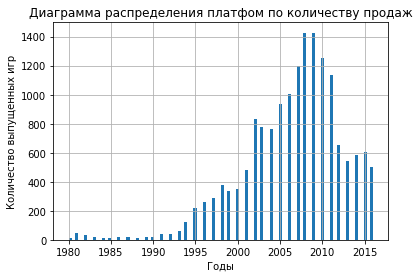

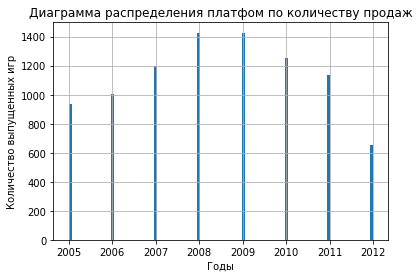

In [16]:
print(games['year_of_release'].value_counts())
games.hist('year_of_release', bins = 100)
plt.title('Диаграмма распределения платфом по количеству продаж')
plt.ylabel('Количество выпущенных игр')
plt.xlabel('Годы')
plt.show()
games.hist('year_of_release', bins = 100, range = (2005, 2012))
plt.title('Диаграмма распределения платфом по количеству продаж')
plt.ylabel('Количество выпущенных игр')
plt.xlabel('Годы')
plt.show()

In [17]:
print('Доля игр приходящихся на разработанные в 2008-2009 годах:', (1427+1426)/len(games))

Доля игр приходящихся на разработанные в 2008-2009 годах: 0.17347683327252827


<b>Вывод</b>

Из расчетов и гистограмм видно, что наибольшее количество игр разработано в 2008 и 2009 годах (1427 и 1426 соответственно), что составляет почти 17 % от общего числа разработанных игр.

До 1993 года количество разработанных игр исчислялось всего лишь десятками (до 62 игр в год), затем отмечается быстрый ежегодный рост количества игр. После 2009 года отмечается спад количества разработанных игр. Возможно игры стали более громоздкими, "продвинутыми" и требующими затраты гораздо больших сил и денег, возможно поэтому их число стало сокращаться.

Думаю учет игр разработанных до 1993 года не сыграет роли в дальнейшем анализе, их важность будет не высока.

### Проанализируем как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним за какой характерный срок появляются новые и исчезают старые платформы.

In [18]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

#### Построим таблицу сумарных продаж игр на разных платформах по годам 

In [19]:
# Построим таблицу сумарных продаж игр на разных платформах по годам                                 
games_platform_sales = games.pivot_table(index='year_of_release', columns='platform', values='sales_allreg', aggfunc='sum')
platform_total_sales = copy.deepcopy(games_platform_sales) # для построения столбчатой диаграммы общей суммы продаж по каждой платформе
display(games_platform_sales)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980.0,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,53.44,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986.0,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987.0,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,NaN,45.01,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Анализ проводится с 1980 по 2016 годы. В таблице много пустых значений (NaN). Заполненные ячейки показывают в каких годах выпускались игры на тех или иных платформах.

#### Построим тепловую карту распределения продаж по платформам и годам

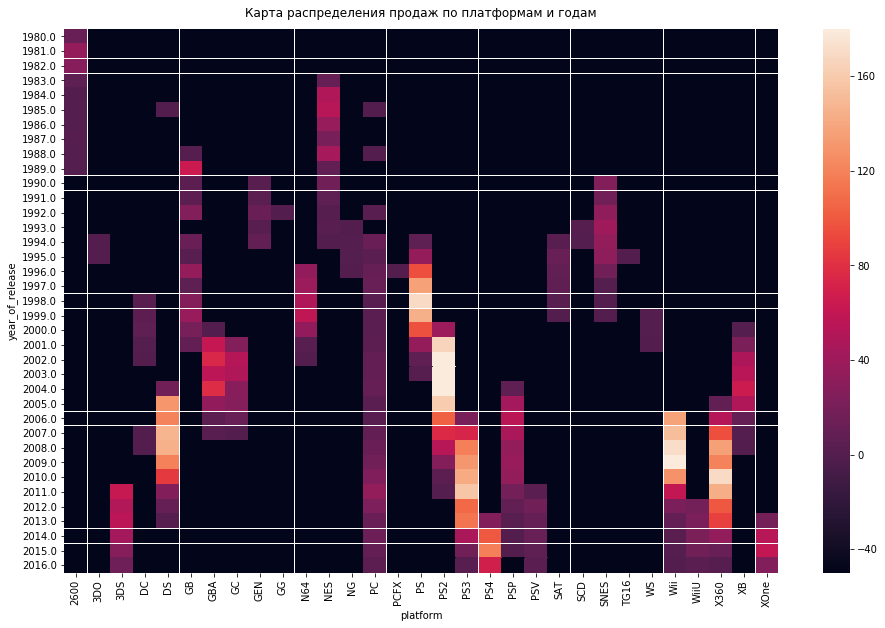

In [20]:
# Построим тепловую карту распределения продаж по платформам и годам
games_platform_sales = games_platform_sales.fillna(-50)
heatmap = plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(games_platform_sales, vmin=-50, vmax=180, linewidths=.001)
heatmap.set_title('Карта распределения продаж по платформам и годам', fontdict={'fontsize':12}, pad=12)
plt.show()

<b>Вывод</b>

По карте видно, что все платформы использовались в определеный период. Изначально почти у всех платформ вна начальном этапе внедрения объем продаж небольшой (за исключением Wii), затем возростает и после достижения пика снова снижается. 

Отчетливо видно по карте, что платформы серии 'PS', а также платформы 'DS', 'Wii', 'X360' наиболее успешны и их объемы продаж выше других платформ.

#### Найдем общую сумму продаж по каждой платформе за все года и построим столбчатую диаграмму общей суммы продаж по каждой платформе

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013.0,0.00,0.0,56.57,0.00,1.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.38,0.00,0.00,0.00,113.25,25.99,3.14,10.59,0.00,0.00,0.00,0.00,0.00,8.59,21.65,88.58,0.00,18.96
2014.0,0.00,0.0,43.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.28,0.00,0.00,0.00,47.76,100.00,0.24,11.90,0.00,0.00,0.00,0.00,0.00,3.75,22.03,34.74,0.00,54.07
2015.0,0.00,0.0,27.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.52,0.00,0.00,0.00,16.82,118.90,0.12,6.25,0.00,0.00,0.00,0.00,0.00,1.14,16.35,11.96,0.00,60.14
2016.0,0.00,0.0,15.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.25,0.00,0.00,0.00,3.60,69.25,0.00,4.25,0.00,0.00,0.00,0.00,0.00,0.18,4.60,1.52,0.00,26.15
Total_sales,86.48,0.1,257.81,15.95,802.78,254.43,312.88,196.73,30.77,0.04,218.01,251.05,1.44,255.76,0.03,727.58,1233.56,931.34,314.14,289.53,53.81,33.59,1.86,200.04,0.16,1.42,891.18,82.19,961.24,251.57,159.32


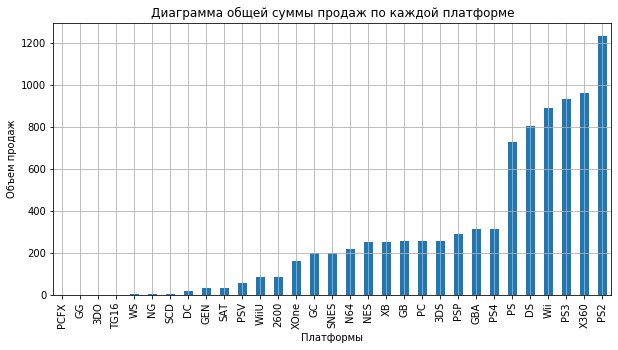

In [21]:
# Найдем общую сумму продаж по каждой платформе за все года (строка 'Total_sales')
platform_total_sales = platform_total_sales.fillna(0)
platform_sales = copy.deepcopy(platform_total_sales) # для построения столбчатых диаграмм распределения суммарных продаж платформ по годам
platform_total_sales.loc['Total_sales'] = platform_total_sales.sum()
display(platform_total_sales.tail(5))

# Построим столбчатую диаграмму общей суммы продаж по каждой платформе
platform_total_sales.loc['Total_sales'].sort_values().plot(y='Total_sales', kind='bar', figsize=(10, 5), grid=True)
plt.title('Диаграмма общей суммы продаж по каждой платформе')
plt.ylabel('Объем продаж')
plt.xlabel('Платформы')
plt.show()

<b>Вывод</b>

В число лидеров входят платформы (по возрастанию объема продаж): 'PS', 'DS', 'PS3', 'Wii', 'X360', 'PS2'. Все остальные платформы сильно отстают. Лидером из лидеров является платформа 'PS2' с объемом продаж - 1233.56 млн. Платформы серии 'PS' занимают лидирующие позиции из всех платформ.

На данной диаграмме мы видим подтверждение выводов сделанных по тепловой карте.

#### Построим графики распределения суммарных продаж платформ, занимающим лидирующие позиции по годам

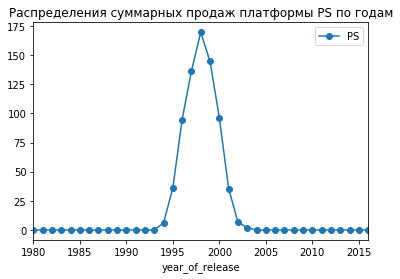

In [22]:
# Построим график распределения суммарных продаж платформы PS по годам
platform_sales = platform_sales.reset_index()
platform_sales_ps = platform_sales[['year_of_release', 'PS']]
platform_sales_ps.plot(x='year_of_release', y='PS', style='o-', title='Распределения суммарных продаж платформы PS по годам')
plt.show()

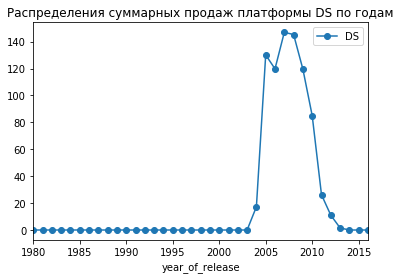

In [24]:
# Построим график распределения суммарных продаж платформы DS по годам
platform_sales_ds = platform_sales[['year_of_release', 'DS']]
platform_sales_ds.plot(x='year_of_release', y='DS', style='o-', title='Распределения суммарных продаж платформы DS по годам')
plt.show()

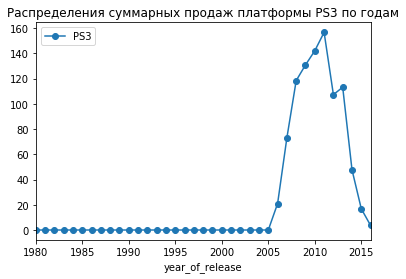

In [25]:
# Построим график распределения суммарных продаж платформы PS3 по годам
platform_sales_ps3 = platform_sales[['year_of_release', 'PS3']]
platform_sales_ps3.plot(x='year_of_release', y='PS3', style='o-', title='Распределения суммарных продаж платформы PS3 по годам')
plt.show()

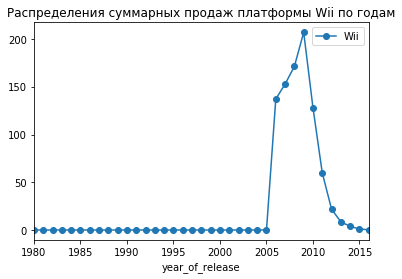

In [27]:
# Построим график распределения суммарных продаж платформы Wii по годам
platform_sales_wii = platform_sales[['year_of_release', 'Wii']]
platform_sales_wii.plot(x='year_of_release', y='Wii', style='o-', title='Распределения суммарных продаж платформы Wii по годам')
plt.show()

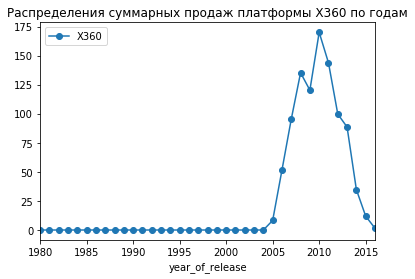

In [28]:
# Построим график распределения суммарных продаж платформы X360 по годам
platform_sales_x360 = platform_sales[['year_of_release', 'X360']]
platform_sales_x360.plot(x='year_of_release', y='X360', style='o-', title='Распределения суммарных продаж платформы X360 по годам')
plt.show()

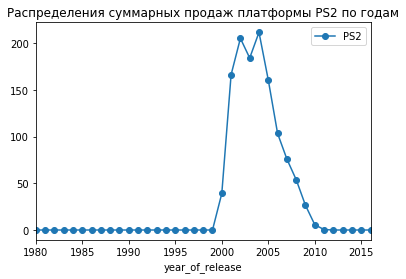

In [29]:
# Построим график распределения суммарных продаж платформы PS2 по годам
platform_sales_ps2 = platform_sales[['year_of_release', 'PS2']]
platform_sales_ps2.plot(x='year_of_release', y='PS2', style='o-', title='Распределения суммарных продаж платформы PS2 по годам')
plt.show()

<b>Дополнтельно построим столбчатую диаграмму распределения суммарных продаж платформы PС по годам</b>

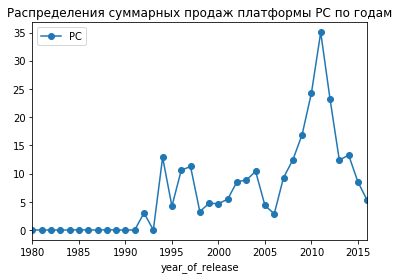

In [31]:
# Построим график распределения суммарных продаж платформы PС по годам
platform_sales_pс = platform_sales[['year_of_release', 'PC']]
platform_sales_pс.plot(x='year_of_release', y='PC', style='o-', title='Распределения суммарных продаж платформы PС по годам')
plt.show()

<b>Возьмем данные за соответствующий актуальный период. Эти данные помогут построить прогноз на 2017 год.</b>

Исходя из предыдущих исследований, считаю, что за актуальный перид можно взять период с 2012-го до 2016 года.

Судя по графикам можно сказать, все платформы характеризуются 3-мя этапами жизни: 1) появление платформы, в этот период ее продажи начинают расти; 2) рост популярности и достжение пика продаж; 3) появление новой платформы, рост уже ее поулярности и снижение популярности старой платформы, снижение продаж и последующее исчезновение. 

Это не касается платформы PC. Эта плаформа характеризуеся самым долгим периодом жизни из всех платформ и до  сих пор используется. Думаю эта платформа и дальше продолжит жить. Для наглядности сделал график распределения суммарных продаж платформы PС по годам в дополнение к лидирующим платформам по продажам. Продажи игр на этой платформе поднимались и падали, но вместе с тем <b>платформа PC лидирует как долгожитель.</b>

### Для дальнейшего анализа сформируем новую таблицу 'games_period' из таблицы 'games' за период 2012 - 2016 годы

In [32]:
games_period = games.query('year_of_release >= 2012').reset_index(drop=True)
display(games_period)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_allreg
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,-,14.63
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,-,14.60
4,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
2882,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
2884,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01


In [35]:
# Построим таблицу сумарных продаж игр на разных платформах за актуальный период                                 
games_period_platform_sales = games_period.pivot_table(index='year_of_release', columns='platform', values='sales_allreg', aggfunc='sum')
platform_total_sales_period = copy.deepcopy(games_period_platform_sales) # для построения столбчатой диаграммы общей суммы продаж по каждой платформе
display(games_period_platform_sales)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012.0,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<b>Найдем общую сумму продаж по каждой платформе за актуальный период и построим столбчатую диаграмму общей суммы продаж по каждой платформе</b>

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012.0,51.36,11.01,23.22,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15
Total_sales,194.61,12.55,62.65,288.79,314.14,11.19,49.18,35.37,82.19,236.54,159.32


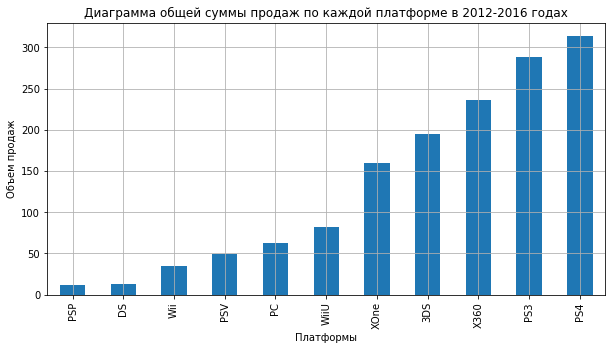

In [34]:
# Найдем общую сумму продаж по каждой платформе за все года (строка 'Total_sales')
games_period_platform_sales = games_period_platform_sales.fillna(0)
games_platform_sales = copy.deepcopy(games_period_platform_sales)
games_period_platform_sales.loc['Total_sales'] = games_period_platform_sales.sum()
display(games_period_platform_sales)

# Построим столбчатую диаграмму общей суммы продаж по каждой платформе
games_period_platform_sales.loc['Total_sales'].sort_values().plot(y='Total_sales', kind='bar', figsize=(10, 5), grid=True)
plt.title('Диаграмма общей суммы продаж по каждой платформе в 2012-2016 годах')
plt.ylabel('Объем продаж')
plt.xlabel('Платформы')
plt.show()

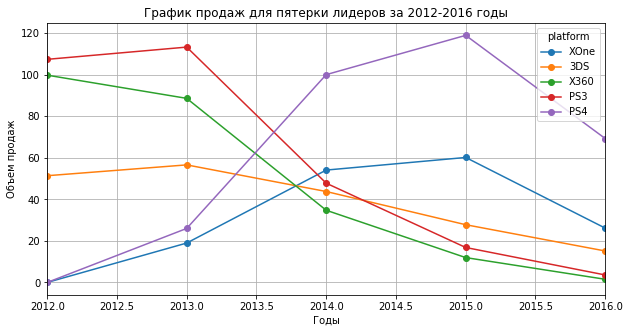

In [36]:
# Построим график продаж для пятерки лидеров за актуальный период
games_platform_sales = games_platform_sales[['XOne', '3DS', 'X360', 'PS3', 'PS4']]
games_platform_sales.plot(style='o-', title='График продаж для пятерки лидеров за 2012-2016 годы', figsize=(10, 5), grid=True)
plt.ylabel('Объем продаж')
plt.xlabel('Годы')
plt.show()

### Отметим, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

<b>За весь период с 1980 по 2016 годы</b>

В число лидеров входят платформы: 'PS', 'DS', 'PS3', 'Wii', 'X360', 'PS2'. Все остальные платформы сильно отстают. Наибольший объем продаж отмечен у игр на платформе 'PS2' с объемом продаж - 1233.56 млн. Вообще платформы серии 'PS' постепенно сменяя друг друга остаются в числе лидеров.

Платформа PC в отличии от других платформ продолжает с 1984 года получать стабильно-средний доход от продаж.

Много платформ исчезло из инустрии игр еще в предыдущие ранние годы до 2000-го года: 2600, 3DO, GEN, NES, PCFX, SAT, SCD, SNES, TG16, WS.

<b>За актуальный период с 2012 по 2016 годы</b>

Картина поменялась. В пятерку лидеров по общему объему продаж вошли платформы: 'XOne', '3DS', 'X360', 'PS3', 'PS4'. 
Жизненный цикл платформ кроме 'PS4' завершается и судя по всему в ближайшие годы игры на них перестанут выпускаться. Судя по графику продаж, и  в частности показателям за 2016 год, дольше всех продержутся платформы 'XOne' и 'PS4', особенно 'PS4'.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам (для дидирующих платформ). Опишем результат.

In [37]:
# Сформируем таблицу глобальных продаж игр в разбивке по платформам за актуальный период
platform_sales_allreg = games_period[['platform', 'sales_allreg']]
display(platform_sales_allreg)

,platform,sales_allreg
0,PS3,21.05
1,X360,16.27
2,PS4,14.63
3,3DS,14.60
4,PS3,13.79
...,...,...
2881,PSV,0.01
2882,PSV,0.01
2883,PS3,0.01
2884,PSV,0.01


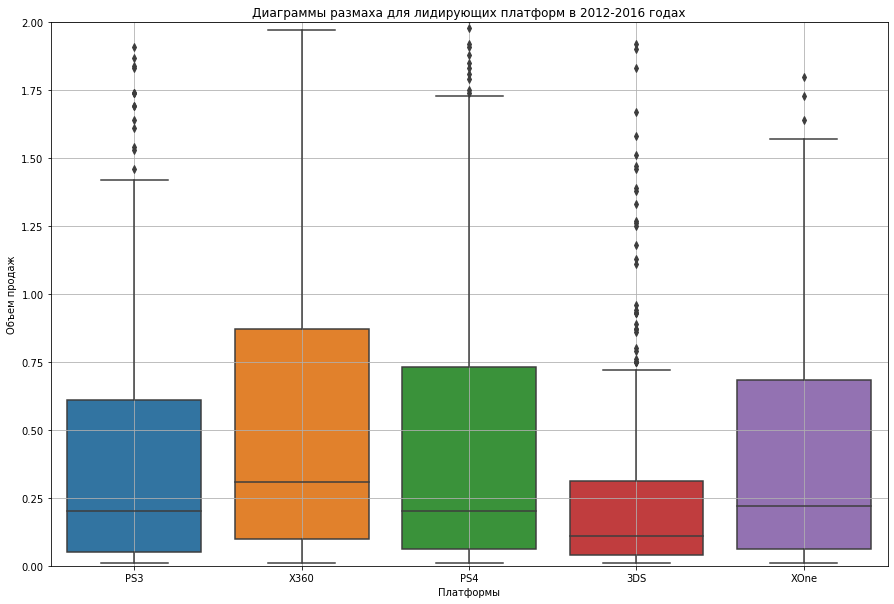

In [38]:
# Построим таблицу общих продаж игр на 5 лидирующих платформах в актуальный период
platform_sales_allreg_top = platform_sales_allreg.query('platform == ["XOne", "3DS", "X360", "PS3", "PS4"]')
# Построим график диаграмм размаха для 5 лидирующих платформ в актуальный период
plt.figure(figsize=(15, 10))
sns.boxplot(data = platform_sales_allreg_top, x = 'platform', y = 'sales_allreg')
plt.title('Диаграммы размаха для лидирующих платформ в 2012-2016 годах')
plt.ylabel('Объем продаж')
plt.xlabel('Платформы')
plt.ylim(0, 2)
plt.grid(True)
plt.show()

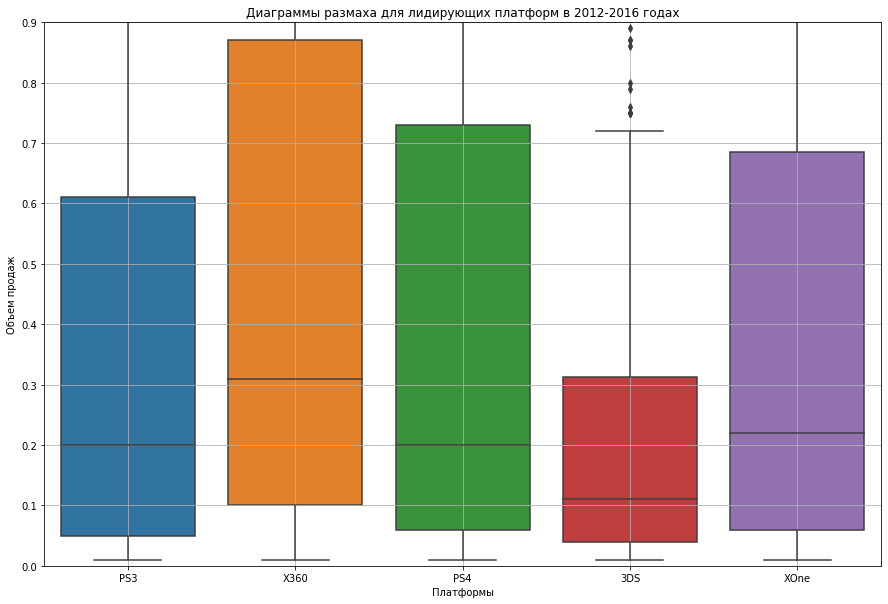

In [39]:
plt.figure(figsize=(15, 10))
sns.boxplot(data = platform_sales_allreg_top, x = 'platform', y = 'sales_allreg')
plt.title('Диаграммы размаха для лидирующих платформ в 2012-2016 годах')
plt.ylabel('Объем продаж')
plt.xlabel('Платформы')
plt.ylim(0, 0.9)
plt.grid(True)
plt.show()

<b>Вывод</b>

Проанализировав диаграммы размаха лидирующих платформ в актуальный период можно сказать, что медианные значения для всех платформ за исключением платформы 'X360' не превышают 0.25 млн, у всех платформ медианы вблизи этой отметки. Средние значения объемов продаж сдвинуты от значения медианы вправо. 4-й квартиль для всех платформ вытянут по сравнению с 1-м. Все это говорит о том, что подавляющая часть значений объемов продаж у всех платформ расположена примерно в интервале от 0.05 до 0.5 млн, а чем дальше тем меньше количество более высоких значений продаж.

### Проанализируем как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков в актуальном периоде. Построим диаграмму рассеяния и подсчитаем корреляцию между отзывами и продажами.

Для расчетов возмем платформу-лидера 'PS4' с наибольшим общим объемом продаж за актуальный период- 314.14 млн.

In [40]:
display(games_period)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_allreg
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,-,14.63
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,-,14.60
4,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
2882,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
2884,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01


In [41]:
games_period_ps4 = games_period.query('platform == "PS4"').reset_index(drop=True)
display(games_period_ps4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_allreg
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,-,14.63
1,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,-,7.98
4,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
387,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,-,0.01
388,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
389,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
390,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


#### Изучим зависимость общего объема продаж игр на платформе 'PS4' от оцеки критиков

In [42]:
# В столбце 'critic_score' имеются не заполненные значения (NaN), при построении диаграмм рассеяния
# данные таких строк не будут учитываться (данные игры не подвергались оценке критиков) 
# иначе произойдет искажение реультатов

games_period_ps4_critic = games_period_ps4.query('critic_score >= 0').reset_index(drop=True)
display(games_period_ps4_critic)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_allreg
0,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
1,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
2,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
3,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
4,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
247,Super Dungeon Bros,PS4,2016.0,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
248,Sherlock Holmes: The Devil's Daughter,PS4,2016.0,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
249,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,-,0.01
250,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


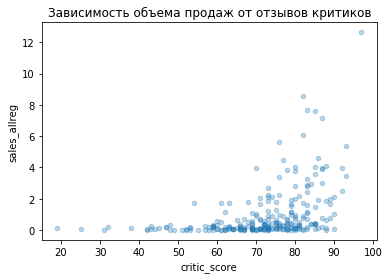

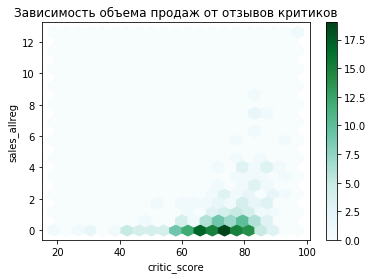

Коэффициент корреляции Пирсона: 0.4065679020617816


In [43]:
games_period_ps4_critic.plot(x='critic_score', y='sales_allreg', kind='scatter', alpha=0.3, title='Зависимость объема продаж от отзывов критиков')
plt.show()
games_period_ps4_critic.plot(x='critic_score', y='sales_allreg', kind='hexbin', gridsize=20, sharex=False, title='Зависимость объема продаж от отзывов критиков')
plt.show()

print('Коэффициент корреляции Пирсона:', games_period_ps4_critic['sales_allreg'].corr(games_period_ps4_critic['critic_score']))

<b>Вывод</b>

По диаграммам расеяния и коэффициенту корреляции (0.40) можно сделать вывод об умеренной положительной зависимости общего объема продаж игр на платформе 'PS4' от оценки критиков. Более высокие рейтинги оценки критиков способствуют росту продаж игр.

#### Изучим зависимость объема продаж игр на платформе 'PS4' от оценки критиков, в зависимости от части света: в Северной Америке, Европе и Японии

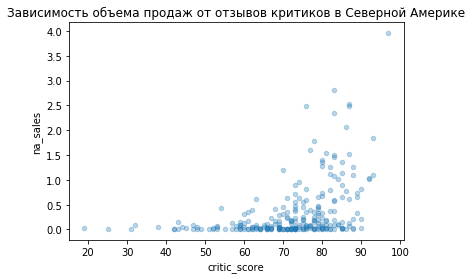

Коэффициент корреляции Пирсона: 0.41500763162387255


In [44]:
games_period_ps4_critic.plot(x='critic_score', y='na_sales', kind='scatter', alpha=0.3, title='Зависимость объема продаж от отзывов критиков в Северной Америке')
plt.show()
print('Коэффициент корреляции Пирсона:',games_period_ps4_critic['na_sales'].corr(games_period_ps4_critic['critic_score']))

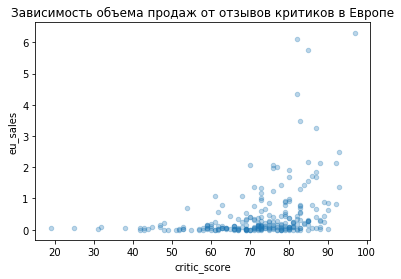

Коэффициент корреляции Пирсона: 0.3467204675025869


In [45]:
games_period_ps4_critic.plot(x='critic_score', y='eu_sales', kind='scatter', alpha=0.3, title='Зависимость объема продаж от отзывов критиков в Европе')
plt.show()
print('Коэффициент корреляции Пирсона:', games_period_ps4_critic['eu_sales'].corr(games_period_ps4_critic['critic_score']))

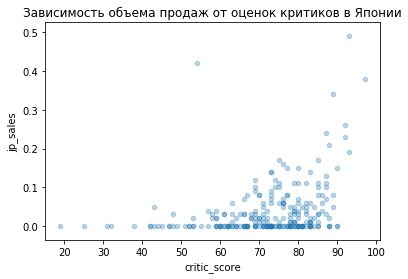

Коэффициент корреляции Пирсона: 0.32235798130845295


In [46]:
games_period_ps4_critic.plot(x='critic_score', y='jp_sales', kind='scatter', alpha=0.3, title='Зависимость объема продаж от оценок критиков в Японии')
plt.show()
print('Коэффициент корреляции Пирсона:', games_period_ps4_critic['jp_sales'].corr(games_period_ps4_critic['critic_score']))

<b>Вывод</b>

При рассмотрении зависимости объема продаж от оценки критиков для разных частей света картина заметно менятся (падают от Америки к Японии) в сравнее с зависимостью общего объема. Эта зависимость и коэффициент корреляции в Северной Америке остались практически такие же (0.41), чего не скажешь о Европе (0.34) и Японии (0.32).

#### Изучим зависимость общего объема продаж игр на платформе 'PS4' от оценки пользователей

In [47]:
# В столбце 'user_score' имеются не заполненные значения (NaN), при построении диаграмм рассеяния
# данные таких строк не будут учитываться (в представленных нам для работы данных оценка польователей не имеется) 
# иначе произойдет искажение реультатов

games_ps4_user = games_period_ps4.query('user_score >= 0').reset_index(drop=True)
display(games_ps4_user)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_allreg
0,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
1,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
2,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
3,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
4,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
252,Super Dungeon Bros,PS4,2016.0,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
253,Sherlock Holmes: The Devil's Daughter,PS4,2016.0,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
254,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,-,0.01
255,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


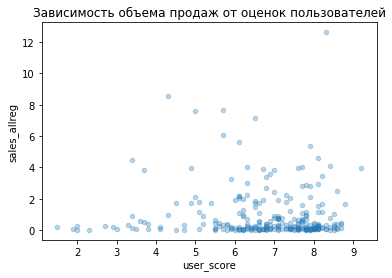

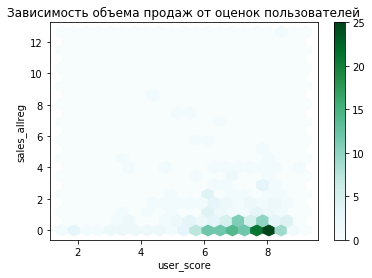

Коэффициент корреляции Пирсона: -0.03195711020455643


In [48]:
games_ps4_user.plot(x='user_score', y='sales_allreg', kind='scatter', alpha=0.3, title='Зависимость объема продаж от оценок пользователей')
plt.show()
games_ps4_user.plot(x='user_score', y='sales_allreg', kind='hexbin', gridsize=20, sharex=False, title='Зависимость объема продаж от оценок пользователей')
plt.show()

print('Коэффициент корреляции Пирсона:', games_ps4_user['sales_allreg'].corr(games_ps4_user['user_score']))

<b>Вывод</b>

По диаграммам расеяния и коэффициенту корреляции (-0.03) можно сделать вывод об отсутствии зависимости общего объема продаж игр на платформе 'PS4' от оценки пользователй.

#### Изучим зависимость объема продаж игр на платформе 'PS4' от оценки пользвателей, в зависимости от части света: в Северной Америке, Европе и Японии

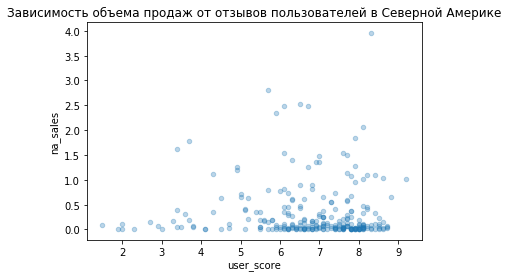

Коэффициент корреляции Пирсона: -0.02093302309978136


In [49]:
games_ps4_user.plot(x='user_score', y='na_sales', kind='scatter', alpha=0.3, title='Зависимость объема продаж от отзывов пользователей в Северной Америке')
plt.show()
print('Коэффициент корреляции Пирсона:', games_ps4_user['na_sales'].corr(games_ps4_user['user_score']))

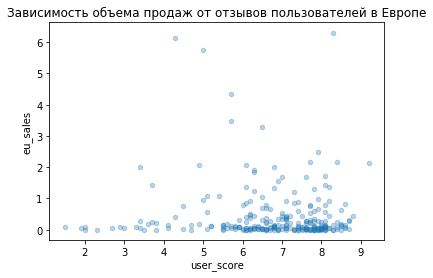

Коэффициент корреляции Пирсона: -0.04892478462009068


In [50]:
games_ps4_user.plot(x='user_score', y='eu_sales', kind='scatter', alpha=0.3, title='Зависимость объема продаж от отзывов пользователей в Европе')
plt.show()
print('Коэффициент корреляции Пирсона:', games_ps4_user['eu_sales'].corr(games_ps4_user['user_score']))

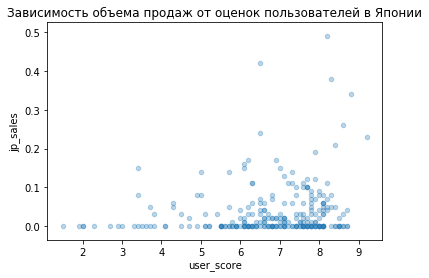

Коэффициент корреляции Пирсона: 0.17133243836273027


In [51]:
games_ps4_user.plot(x='user_score', y='jp_sales', kind='scatter', alpha=0.3, title='Зависимость объема продаж от оценок пользователей в Японии')
plt.show()
print('Коэффициент корреляции Пирсона:', games_ps4_user['jp_sales'].corr(games_ps4_user['user_score']))

<b>Вывод</b>

При рассмотрении зависимости объема продаж от оценки критиков для разных частей света можно сделать вывод об отсутствии зависимости объема продаж игр от мнения пользователей.

### Изучим распределение игр по жанрам. Определим самые прибыльные жанры, а также жанры с высокими и низкими продажами.

In [52]:
display(games_period)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_allreg
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,-,14.63
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,-,14.60
4,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
2882,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
2884,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01


#### Построим диаграммы распределения жанров

In [53]:
# Построим таблцу жанров с указанием количества продаж (num_sales), средних продаж (mid_sales),
# медианых продаж (median_sales) и общего объема продаж (total_sales).
games_genre = games_period.pivot_table(index='genre', values='sales_allreg',
                                aggfunc=('count', 'sum', 'median', 'mean'))
games_genre.columns = ['num_sales', 'mid_sales', 'median_sales', 'total_sales']
display(games_genre)

,num_sales,mid_sales,median_sales,total_sales
genre,,,,
Action,1031,0.427856,0.120,441.12
Adventure,302,0.097450,0.030,29.43
Fighting,109,0.408165,0.130,44.49
Misc,192,0.442917,0.120,85.04
Platform,85,0.717647,0.210,61.00
Puzzle,28,0.174643,0.045,4.89
Racing,115,0.465217,0.140,53.50
Role-Playing,370,0.521081,0.140,192.80
Shooter,235,1.296723,0.440,304.73


Text(0.5, 0, 'genre')

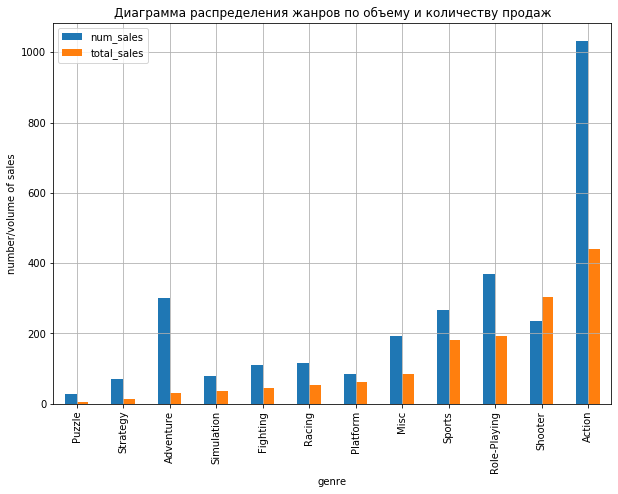

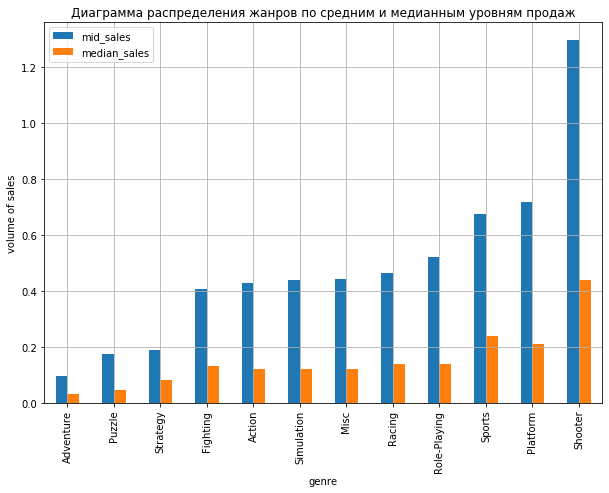

In [54]:
# Разобьем 'games_genre' на две таблицы:
games_genre_total = games_genre[['num_sales', 'total_sales']].sort_values('total_sales')
games_genre_mid = games_genre[['mid_sales', 'median_sales']].sort_values('mid_sales')

# Построим диаграмму распределения жанров по объему и количеству продаж
games_genre_total.plot(kind='bar', grid=True, figsize=(10, 7),
                       title='Диаграмма распределения жанров по объему и количеству продаж')
plt.ylabel('number/volume of sales')
plt.xlabel('genre')

# Построим диаграмму распределения жанров по средним и медианным уровням продаж
games_genre_mid.plot(kind='bar', grid=True, figsize=(10, 7),
                     title='Диаграмма распределения жанров по средним и медианным уровням продаж')
plt.ylabel('volume of sales')
plt.xlabel('genre')

<b>Вывод</b>

В результате анализа жанров игр можно сказать:

   - лидерами по общему объему продаж являются игры жанров 'Action', 'Shooter' и 'Role-Playing' (в порядке убывания), хотя по количеству продаж игры жанра 'Shooter' теряют свою позицию и уступают жанрам 'Role-Playing' и 'Adventure';
    
   - лидерами по среднему уровню объема продаж являются игры жанров 'Shooter', 'Platform' и 'Sports' (в порядке убывания), в тоже время по медианному уровню продаж первые три места занимают игры таких же жанров, но в немного другом порядке: 'Shooter', 'Sports' и 'Platform'. При этом средний и медианный уровни продаж сильно отличаются друг от друга для игр всех жанров, средний уровень гораздо выше медианного. Это говорит о наличии единичных продаж игр сильно превышающих по стоимости все остальные игры жанра, такая ситуация характерна для всех жанров.

## 4 Составим портрет пользователя каждого региона

### Изучим портрет пользователя Северной Америки (регион - na) 

<b> Подготовим данные для Северной Америки</b>

In [55]:
# Создадим сводную таблицу продаж в Северной Америке
games_na = games_period[['platform', 'genre', 'na_sales', 'rating']]
display(games_na)

,platform,genre,na_sales,rating
0,PS3,Action,7.02,M
1,X360,Action,9.66,M
2,PS4,Shooter,6.03,-
3,3DS,Role-Playing,5.28,-
4,PS3,Shooter,4.99,M
...,...,...,...,...
2881,PSV,Adventure,0.00,-
2882,PSV,Misc,0.00,-
2883,PS3,Action,0.00,-
2884,PSV,Adventure,0.00,-


#### Самые популярные платформы (топ-5), их различия в долях продаж

<b> Найдем платформы - лидеры по количеству продаж</b>

In [56]:
# Создадим сводную таблицу для определения количества продаж по платформам в Северной Америке
games_na_allsales_platform_1 = games_na.pivot_table(index='genre', columns='platform',
                                                    values='na_sales', aggfunc='count')

games_na_allsales_platform_1.loc['TOTAL'] = games_na_allsales_platform_1.sum()
display(games_na_allsales_platform_1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,,
Action,156.0,15.0,66.0,170.0,144.0,63.0,145.0,21.0,64.0,102.0,85.0
Adventure,33.0,3.0,17.0,42.0,28.0,52.0,92.0,2.0,3.0,16.0,14.0
Fighting,9.0,NaN,3.0,33.0,18.0,4.0,14.0,NaN,5.0,16.0,7.0
Misc,41.0,2.0,5.0,22.0,20.0,10.0,22.0,15.0,22.0,14.0,19.0
Platform,19.0,2.0,3.0,11.0,12.0,NaN,8.0,2.0,17.0,6.0,5.0
Puzzle,13.0,4.0,2.0,1.0,1.0,NaN,2.0,1.0,4.0,NaN,NaN
Racing,1.0,NaN,20.0,21.0,19.0,NaN,9.0,1.0,3.0,21.0,20.0
Role-Playing,79.0,2.0,27.0,61.0,51.0,29.0,84.0,2.0,7.0,14.0,14.0
Shooter,2.0,NaN,41.0,50.0,41.0,NaN,4.0,NaN,10.0,49.0,38.0


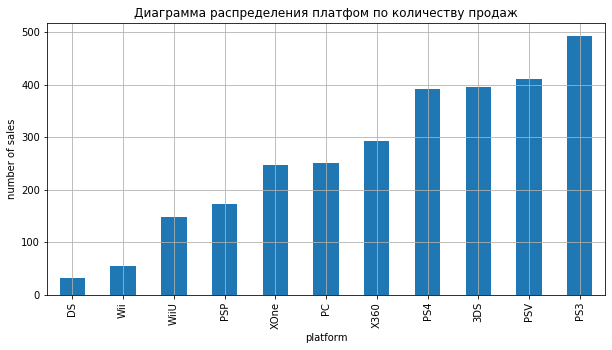

In [57]:
# Построим диаграмму распределения платфом по количеству продаж
games_na_allsales_platform_1.loc['TOTAL'].sort_values().plot(y='TOTAL', kind='bar', grid=True,
                                                             figsize=(10, 5), title='Диаграмма распределения платфом по количеству продаж')
plt.ylabel('number of sales')
plt.xlabel('platform')
plt.show()

<b> Найдем платформы - лидеры по объему продаж продаж</b>

In [60]:
# Создадим сводную таблицу для определения объема продаж по платформам в Северной Америке
games_na_allsales_platform_2 = games_na.pivot_table(index='genre', columns='platform',
                                         values='na_sales', aggfunc='sum')

games_na_allsales_platform_2.loc['TOTAL'] = games_na_allsales_platform_2.sum()
display(games_na_allsales_platform_2)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,,
Action,13.76,0.79,4.28,39.98,32.83,0.05,3.47,6.09,9.69,45.53,21.37
Adventure,0.82,0.00,0.03,2.22,1.95,0.00,0.59,0.04,0.07,1.93,1.27
Fighting,3.51,NaN,0.01,3.70,3.60,0.00,0.85,NaN,3.28,3.19,1.65
Misc,1.70,0.06,0.36,3.51,3.14,0.00,0.64,8.77,5.50,9.74,4.77
Platform,7.28,0.21,0.01,1.90,2.45,NaN,0.63,1.21,9.94,1.24,0.51
Puzzle,0.51,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.62,NaN,NaN
Racing,0.12,NaN,0.05,2.58,2.61,NaN,0.72,0.00,3.47,3.31,4.36
Role-Playing,22.59,3.35,5.65,7.67,9.34,0.00,2.13,0.00,1.06,6.06,6.15
Shooter,0.00,NaN,4.95,22.31,32.66,NaN,0.95,NaN,2.34,44.70,36.86


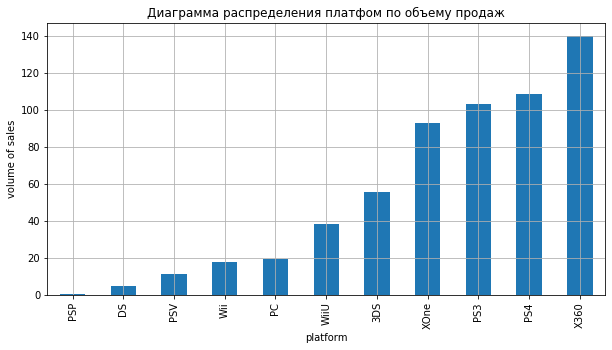

In [61]:
# Построим диаграмму распределения платфом по объему продаж
games_na_allsales_platform_2.loc['TOTAL'].sort_values().plot(y='TOTAL', kind='bar', grid=True,
                                                             figsize=(10, 5), title='Диаграмма распределения платфом по объему продаж')
plt.ylabel('volume of sales')
plt.xlabel('platform')
plt.show()

<b>Вывод</b>

В результате анализа платформ для игр проданных в Сверной Америке можно увидеть, что:

- лидерами по количеству продаж являются плаформы: PS3 (493 продажи), PSV (411 продаж), 3DS (396 продаж), PS4 (392 продажи), X360 (292 продажи);

- лидерами по объему продаж являются плаформы: X360 (140.05 млн.), PS4 (108.74 млн.), PS3 (103.38 млн.), XOne (93.12 млн.) и 3DS (55.31 млн.). Платформа X360  не смотря на последнее место в пятерке лидеров по количеству продаж занимает первое метсто по объему продаж в актуальный период.

#### Самые популярные жанры (топ-5), их различия в долях продаж

In [63]:
# Создадим сводную таблицу для определения количества и объема продаж по жанрам в Северной Америке
games_na_allsales_genre = games_na.pivot_table(index='platform', columns='genre',
                                         values='na_sales', aggfunc=('count', 'sum'))

games_na_allsales_genre.loc['TOTAL'] = games_na_allsales_genre.sum()
display(games_na_allsales_genre)

count                                                   \
genre     Action Adventure Fighting   Misc Platform Puzzle Racing   
platform                                                            
3DS        156.0      33.0      9.0   41.0     19.0   13.0    1.0   
DS          15.0       3.0      NaN    2.0      2.0    4.0    NaN   
PC          66.0      17.0      3.0    5.0      3.0    2.0   20.0   
PS3        170.0      42.0     33.0   22.0     11.0    1.0   21.0   
PS4        144.0      28.0     18.0   20.0     12.0    1.0   19.0   
PSP         63.0      52.0      4.0   10.0      NaN    NaN    NaN   
PSV        145.0      92.0     14.0   22.0      8.0    2.0    9.0   
Wii         21.0       2.0      NaN   15.0      2.0    1.0    1.0   
WiiU        64.0       3.0      5.0   22.0     17.0    4.0    3.0   
X360       102.0      16.0     16.0   14.0      6.0    NaN   21.0   
XOne        85.0      14.0      7.0   19.0      5.0    NaN   20.0   
TOTAL     1031.0     302.0    109.0  192.0     85.0   28.0  115.0   

                                                             sum            \
genre    Role-Playing Shooter Simulation Sports Strategy  Action Adventure   
platform                                                                     
3DS              79.0     2.0       20.0   12.0     11.0   13.76      0.82   
DS                2.0     NaN        1.0    2.0      NaN    0.79      0.00   
PC               27.0    41.0       23.0   17.0     26.0    4.28      0.03   
PS3              61.0    50.0       11.0   63.0      8.0   39.98      2.22   
PS4              51.0    41.0        6.0   46.0      6.0   32.83      1.95   
PSP              29.0     NaN        1.0   10.0      4.0    0.05      0.00   
PSV              84.0     4.0        3.0   21.0      7.0    3.47      0.59   
Wii               2.0     NaN        2.0    7.0      1.0    6.09      0.04   
WiiU              7.0    10.0        1.0    8.0      3.0    9.69      0.07   
X360             14.0    49.0        8.0   44.0      2.0   45.53      1.93   
XOne             14.0    38.0        4.0   38.0      3.0   21.37      1.27   
TOTAL           370.0   235.0       80.0  268.0     71.0  177.84      8.92   

                                                                      \
genre    Fighting   Misc Platform Puzzle Racing Role-Playing Shooter   
platform                                                               
3DS          3.51   1.70     7.28   0.51   0.12        22.59    0.00   
DS            NaN   0.06     0.21   0.00    NaN         3.35     NaN   
PC           0.01   0.36     0.01   0.00   0.05         5.65    4.95   
PS3          3.70   3.51     1.90   0.00   2.58         7.67   22.31   
PS4          3.60   3.14     2.45   0.00   2.61         9.34   32.66   
PSP          0.00   0.00      NaN    NaN    NaN         0.00     NaN   
PSV          0.85   0.64     0.63   0.00   0.72         2.13    0.95   
Wii           NaN   8.77     1.21   0.00   0.00         0.00     NaN   
WiiU         3.28   5.50     9.94   0.62   3.47         1.06    2.34   
X360         3.19   9.74     1.24    NaN   3.31         6.06   44.70   
XOne         1.65   4.77     0.51    NaN   4.36         6.15   36.86   
TOTAL       19.79  38.19    25.38   1.13  17.22        64.00  144.77   

                                     
genre    Simulation Sports Strategy  
platform                             
3DS            3.98   0.73     0.31  
DS             0.11   0.07      NaN  
PC             1.68   0.15     1.95  
PS3            0.51  18.66     0.34  
PS4            0.21  19.78     0.17  
PSP            0.00   0.08     0.00  
PSV            0.01   0.96     0.03  
Wii            0.07   1.12     0.15  
WiiU           0.14   1.50     0.49  
X360           0.94  22.89     0.52  
XOne           0.32  15.59     0.27  
TOTAL          7.97  81.53     4.23

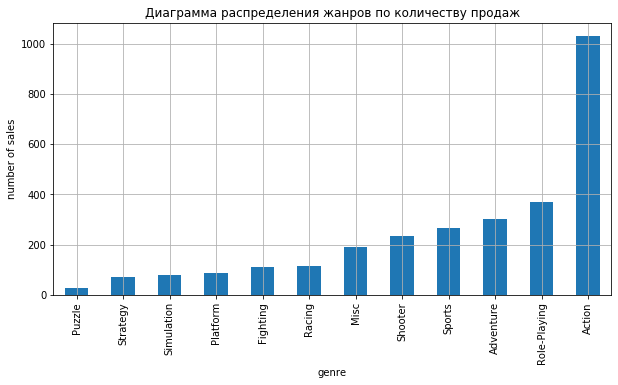

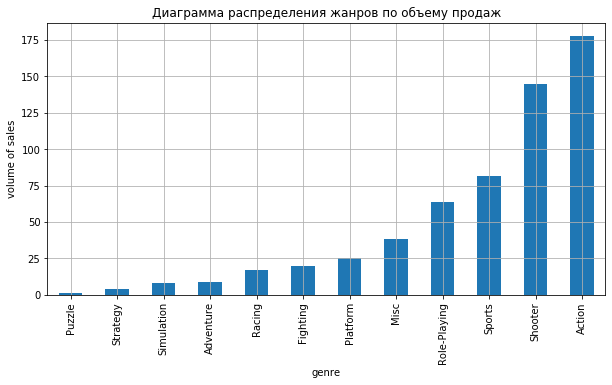

In [64]:
# Построим диаграммы распределения жанров по количеству и объему продаж в Северной Америке
axs1 = games_na_allsales_genre.loc['TOTAL', 'count'].sort_values().plot(y='TOTAL', kind='bar', grid=True,
                                                             figsize=(10, 5), title='Диаграмма распределения жанров по количеству продаж')
plt.ylabel('number of sales')
plt.xlabel('genre')
plt.show()

axs2 = games_na_allsales_genre.loc['TOTAL', 'sum'].sort_values().plot(y='TOTAL', kind='bar', grid=True,
                                                             figsize=(10, 5), title='Диаграмма распределения жанров по объему продаж')
plt.ylabel('volume of sales')
plt.xlabel('genre')
plt.show()

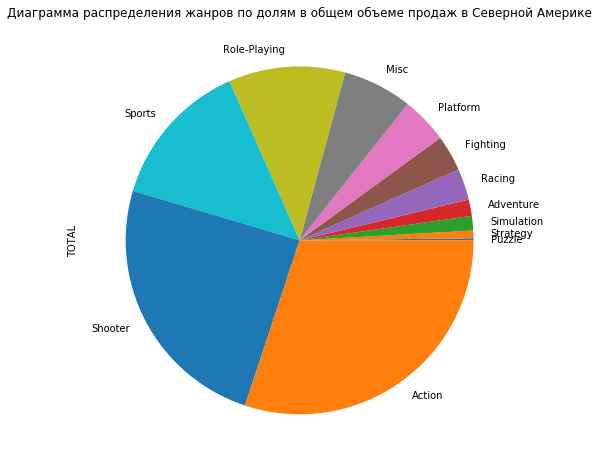

In [65]:
# Построим круговую диаграмму распределения жанров по долям в общем объеме продаж в актуальный период
games_na_allsales_genre.loc['TOTAL', 'sum'].sort_values().plot(y='TOTAL', kind='pie', 
                                                             figsize=(8, 8), title='Диаграмма распределения жанров по долям в общем объеме продаж в Северной Америке')
plt.show()

<b>Вывод</b>

В результате анализа жанров игр проданных в Сверной Америке можно увидеть, что:

- лидерами среди лидеров становятся игры жанра Action и занимая первое место и по количеству и по объему продаж;

- лидерами по количеству продаж являются жанры: Action (1031 продажа), далее с очень большим отставанием: Role-Playing (370 продаж), Adventure (302 продажи) Sports (268 продаж) и Shooter (235 продаж);

- лидерами по объему продаж являются жанры: Action (177.84 млн.), Shooter (144.77 млн.), Sports (81.53 млн.), Role-Playing (64.00 млн.) и Misc (38.19 млн.). Игры жанров Action и Shooter по объему продаж уходит в больший отрыв от всех остальных жанров.

Кстати, игры жанра Action лидировали и по количеству и по объему продаж не только с 2012 по 2016 год, но и с 1980 по 2016 год с объемом продаж 879.01 млн. Это удалось выяснить в результате ошибочного анализа, взяв вместо актуального периода весь период с 1980 года.

#### Выясним влияет ли рейтинг ESRB на продажи в Северной Америке

In [66]:
display(games_na.groupby('rating')['na_sales'].sum())

rating
-       103.31
E       114.37
E10+     75.70
M       231.57
T        66.02
Name: na_sales, dtype: float64

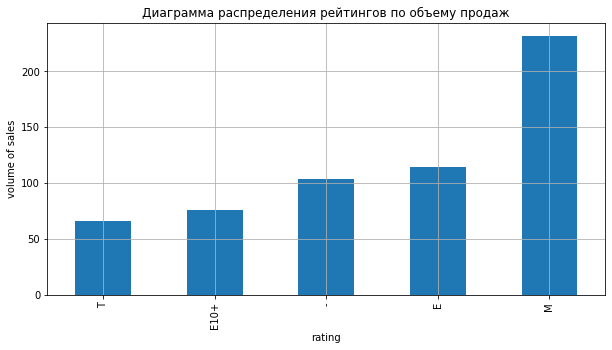

In [67]:
games_na.groupby('rating')['na_sales'].sum().sort_values().plot(kind='bar', grid=True,
                                                  figsize=(10, 5), title='Диаграмма распределения рейтингов по объему продаж')
plt.ylabel('volume of sales')
plt.show()

<b>Категории ESRB</b>

E - «Для всех»

T - «Подросткам (от 13 лет)»

M - «Для всех от 17 лет и старше»

E10+ - «Для всех от 10 лет и старше»

EC - «Для детей младшего возраста (от 3-х лет)»

RP - «Рейтинг ожидается (продукт ожидает присвоения рейтинга)»

K-A - «Для детей и взрослых (от 6 лет)». Этот рейтинг был заменён на «E» 01.01.1998 и встречается в играх ранее этого года

AO - «Только для взрослых (старше 18 лет)»

<b>Вывод</b>

На диаграмме можно увидеть, самый большой объем продаж у игр с категорией от 17 лет. При этом игры, которым рейтинг не присвоен занимают третье место в уровне объема продаж в Северной Америке.

### Изучим портрет пользователя Европы (регион - eu) 

<b> Подготовим данные для Европы</b>

In [68]:
# Создадим сводную таблицу продаж в Европе
games_eu = games_period[['platform', 'genre', 'eu_sales', 'rating']]
display(games_eu)

,platform,genre,eu_sales,rating
0,PS3,Action,9.09,M
1,X360,Action,5.14,M
2,PS4,Shooter,5.86,-
3,3DS,Role-Playing,4.19,-
4,PS3,Shooter,5.73,M
...,...,...,...,...
2881,PSV,Adventure,0.00,-
2882,PSV,Misc,0.00,-
2883,PS3,Action,0.00,-
2884,PSV,Adventure,0.00,-


#### Самые популярные платформы (топ-5), их различия в долях продаж в Европе

<b> Найдем платформы - лидеры по объему продаж</b>

In [69]:
# Создадим сводную таблицу для определения объема продаж по платформам в Европе
games_eu_allsales_platform_1 = games_eu.pivot_table(index='genre', columns='platform', values='eu_sales', aggfunc='sum')

games_eu_allsales_platform_1.loc['TOTAL'] = games_eu_allsales_platform_1.sum()
display(games_eu_allsales_platform_1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,,
Action,9.19,0.71,7.63,43.63,42.71,0.20,4.15,3.40,6.74,28.40,12.58
Adventure,0.61,0.05,0.77,2.02,3.00,0.00,0.58,0.14,0.08,1.04,1.17
Fighting,1.47,NaN,0.11,2.58,2.97,0.00,0.42,NaN,1.49,1.21,0.54
Misc,2.08,0.37,0.31,3.26,3.35,0.00,0.94,6.58,3.69,3.74,2.00
Platform,6.26,0.43,0.12,1.63,3.60,NaN,1.11,0.84,6.38,0.70,0.34
Puzzle,0.87,0.09,0.03,0.00,0.02,NaN,0.01,0.00,0.38,NaN,NaN
Racing,0.14,NaN,1.08,6.26,7.45,NaN,0.97,0.01,2.53,4.27,4.58
Role-Playing,14.37,1.77,6.67,5.49,11.96,0.00,1.28,0.00,0.77,2.79,3.43
Shooter,0.06,NaN,8.02,24.56,39.16,NaN,0.83,NaN,1.75,21.29,17.80


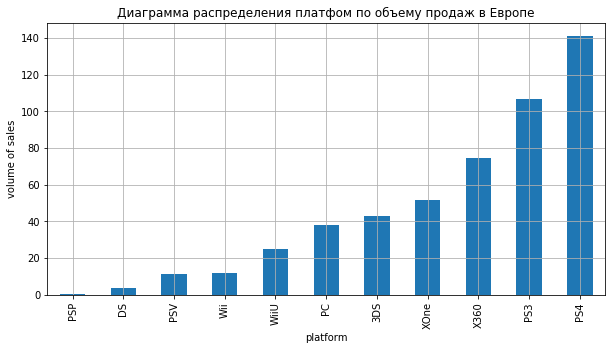

In [70]:
# Построим диаграмму распределения платфом по объему продаж в Европе
games_eu_allsales_platform_1.loc['TOTAL'].sort_values().plot(y='TOTAL', kind='bar', grid=True,
                                                             figsize=(10, 5), title='Диаграмма распределения платфом по объему продаж в Европе')
plt.ylabel('volume of sales')
plt.xlabel('platform')
plt.show()

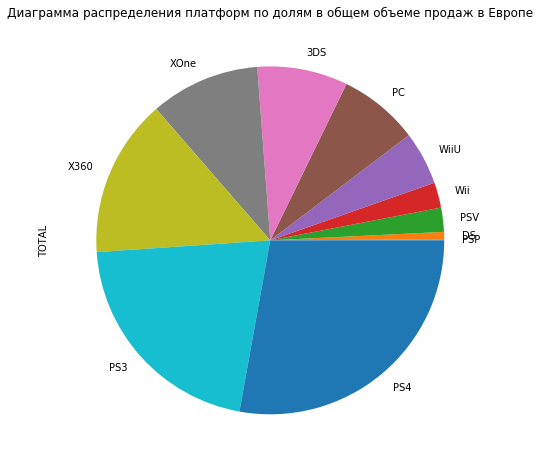

In [71]:
# Построим круговую диаграмму распределения платформ по долям в общем объеме продаж в актуальный период в Европе
games_eu_allsales_platform_1.loc['TOTAL'].sort_values().plot(y='TOTAL', kind='pie', 
                                                             figsize=(8, 8), title='Диаграмма распределения платформ по долям в общем объеме продаж в Европе')
plt.show()

<b>Вывод</b>

В результате анализа платформ игр проданных в Европе можно увидеть, что:

- лидерами по объему продаж являются плаформы: PS4 (141.09 млн.), PS3 (106.86 млн.), X360 (74.52 млн.), XOne (51.59 млн.) и 3DS (42.64 млн.)

### Изучим портрет пользователя в Японии (регион - jp) 

<b> Подготовим данные для Европы</b>

In [72]:
# Создадим сводную таблицу продаж в Японии
games_jp = games_period[['platform', 'genre', 'jp_sales', 'rating']]
display(games_jp)

,platform,genre,jp_sales,rating
0,PS3,Action,0.98,M
1,X360,Action,0.06,M
2,PS4,Shooter,0.36,-
3,3DS,Role-Playing,4.35,-
4,PS3,Shooter,0.65,M
...,...,...,...,...
2881,PSV,Adventure,0.01,-
2882,PSV,Misc,0.01,-
2883,PS3,Action,0.01,-
2884,PSV,Adventure,0.01,-


#### Самые популярные платформы (топ-5), их различия в долях продаж в Японии

<b> Найдем платформы - лидеры по объему продаж</b>

In [73]:
# Создадим сводную таблицу для определения количества продаж по платформам в Японии
games_jp_allsales_platform_1 = games_jp.pivot_table(index='genre', columns='platform', values='jp_sales', aggfunc='sum')

games_jp_allsales_platform_1.loc['TOTAL'] = games_jp_allsales_platform_1.sum()
display(games_jp_allsales_platform_1)



platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,,
Action,20.51,0.20,0.0,13.95,5.90,3.42,6.71,0.43,1.09,0.54,0.05
Adventure,2.73,0.01,0.0,1.03,0.45,1.67,2.28,0.00,0.00,0.04,0.03
Fighting,2.97,NaN,0.0,3.52,0.75,0.36,0.66,NaN,1.01,0.16,0.01
Misc,5.36,0.00,0.0,0.78,0.42,0.41,2.29,1.10,2.45,0.04,0.01
Platform,4.32,0.00,0.0,0.08,0.49,NaN,0.06,0.00,3.68,0.00,0.00
Puzzle,1.17,0.00,0.0,0.04,0.00,NaN,0.05,0.66,0.22,NaN,NaN
Racing,0.00,NaN,0.0,0.73,0.26,NaN,0.10,0.00,1.30,0.06,0.05
Role-Playing,38.93,3.51,0.0,6.86,3.55,2.81,7.68,1.06,0.89,0.14,0.01
Shooter,0.07,NaN,0.0,4.02,2.81,NaN,0.11,NaN,1.54,0.52,0.16


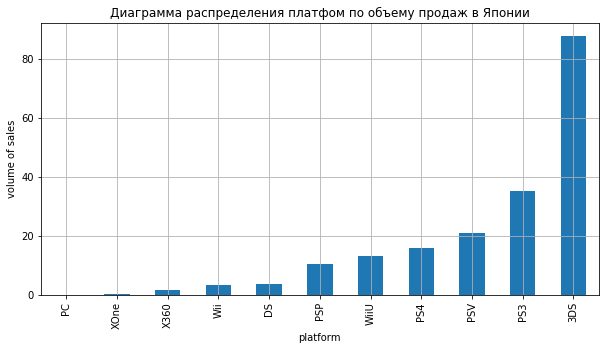

In [74]:
# Построим диаграмму распределения платфом по объему продаж в Японии
games_jp_allsales_platform_1.loc['TOTAL'].sort_values().plot(y='TOTAL', kind='bar', grid=True,
                                                             figsize=(10, 5), title='Диаграмма распределения платфом по объему продаж в Японии')
plt.ylabel('volume of sales')
plt.xlabel('platform')
plt.show()

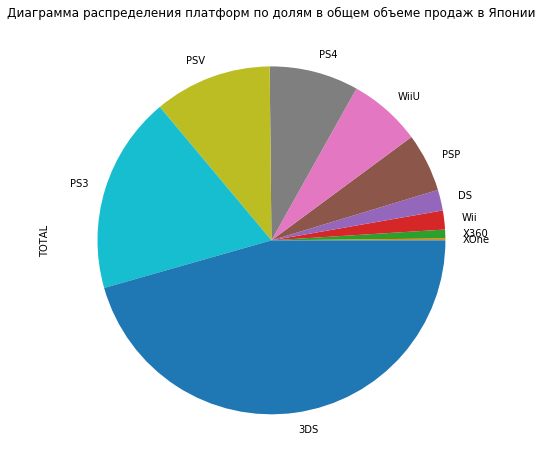

In [75]:
# Построим круговую диаграмму распределения платформ по долям в общем объеме продаж в актуальный период в Японии
games_jp_allsales_platform_1.loc['TOTAL'].sort_values().plot(y='TOTAL', kind='pie', 
                                                             figsize=(8, 8), title='Диаграмма распределения платформ по долям в общем объеме продаж в Японии')
plt.show()

<b>Вывод</b>

В результате анализа платформ игр проданных в Японии:

- лидерами по объему продаж являются плаформы:  с большим отрывом 3DS (87.79 млн.), PS3 (35.29 млн.), PSV (21.04 млн.), PS4 (15.96 млн.) и WiiU (13.01 млн.)

## 5 Проверка гипотез

### Проверим гипотезу: средние пользовательские рейтинги платформ 'Xbox One' и 'PC' одинаковые

In [76]:
display(games_period)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_allreg
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,-,14.63
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,-,14.60
4,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
2882,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01
2884,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,-,0.01


<b>Выделим из таблицы 'games_period' две таблицы для платформ Xbox One и PC.</b>

In [78]:
games_period['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [80]:
# Построим таблицы по данным двум платформам, с имеющимся оценками пользователей
games_xone = games_period.query('platform == "XOne"')
games_xone_userscore = games_xone.query('user_score >= 0')
display(games_xone_userscore)

games_pc = games_period.query('platform == "PC"')
games_pc_userscore = games_pc.query('user_score >= 0')
display(games_pc_userscore)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_allreg
31,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
34,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
44,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
53,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
69,Assassin's Creed: Unity,XOne,2014.0,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
2820,Assassin's Creed Chronicles,XOne,2016.0,Action,0.00,0.01,0.00,0.00,NaN,6.8,T,0.01
2840,Saints Row: Gat out of Hell,XOne,2015.0,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
2854,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
2858,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_allreg
39,Diablo III,PC,2012.0,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
90,The Sims 4,PC,2014.0,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
122,Guild Wars 2,PC,2012.0,Action,0.96,1.07,0.0,0.27,90.0,7.9,T,2.30
173,World of Warcraft: Mists of Pandaria,PC,2012.0,Role-Playing,0.84,0.76,0.0,0.22,82.0,4.8,T,1.82
196,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
2792,TrackMania Turbo,PC,2016.0,Action,0.00,0.01,0.0,0.00,79.0,6.8,E,0.01
2808,Ride 2,PC,2016.0,Racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01
2811,Rugby World Cup 2015,PC,2015.0,Sports,0.00,0.01,0.0,0.00,NaN,1.4,E,0.01
2833,Transformers: Fall of Cybertron,PC,2012.0,Action,0.01,0.00,0.0,0.00,78.0,7.9,T,0.01


<b>Сформулируем нулевую гипотезу H₀ и альтернативную гипотезу H₁</b>

    Нулевая гипотеза будет звучать следующим образом:
Средние пользовательские рейтинги платформ 'Xbox One' и 'PC' не раличаются, т.е. средние двух выборок 'games_xone_userscore['user_score']' и 'games_pc_userscore['user_score']' равны друг другу.

    
    Альтернативная гипотеза будет звучать следующим образом:
Средние пользовательские рейтинги платформ 'Xbox One' и 'PC' различаются, т.е. средние двух выборок 'games_xone_userscore['user_score']' и 'games_pc_userscore['user_score']' не равны друг другу.

Альтернативная гипотеза будет двухсторонней, т.к. средние пользовательские рейтинги могут отличаться как в меньшую, так и в большую сторону.

<b>Проверим гипотезу</b>

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам в Python есть специальный метод: scipy.stats.ttest_ind(array1, array2, equal_var).

In [81]:
alpha = .01 # выберем критический уровень статистической значимости равным 1%
results = st.ttest_ind(
    games_xone_userscore['user_score'], 
    games_pc_userscore['user_score'], equal_var=False) # equal_var беру равным False, т.к. размер выборок не одинаков и у меня нет уверенности, что их дисперсии равны
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


<b>Вывод</b>

По результатам проведенного теста нулевую гипотезу о равенстве средних пользовательских рейтингов платформ 'Xbox One' и 'PC' отвергнуть не удалось. 

p-value равное 0.54 означает, что мы можем отклонить нулевую гипотезу с вероятностью ошибки 54 %. Различия в значениях средних пользовательских рейтингов платформы 'Xbox One' и средних пользовательских рейтингов платформ 'PC' могут быть получены случайно с верояностью 54 %. Это очень большая вероятность (альфа 1 %), поэтому мы не можем сказать, что средние рейтинги значимо отличаются. Следовательно отвергнуть нулевую гипотезу, что средние пользовательские рейтинги не оличаются не получится.
 
Таким образом, можно сделать вывод, что гипотеза о равенстве средних пользовательских рейтингов платформ 'Xbox One' и 'PC' верна.

### Проверим гипотезу: средние пользовательские рейтинги жанров 'Action' и 'Sports' разные

<b>Выделим из таблицы 'games_period' две таблицы для жанров 'Action' и 'Sports'.</b>

In [82]:
games_period['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [83]:
# Построим таблицы по данным двум жанрам, с имеющимся оценками пользователей
games_action = games_period.query('genre == "Action"')
games_action_userscore = games_action.query('user_score >= 0')
display(games_action_userscore)

games_sports = games_period.query('genre == "Sports"')
games_sports_userscore = games_sports.query('user_score >= 0')
display(games_sports_userscore)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_allreg
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
6,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
15,FIFA Soccer 13,PS3,2012.0,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
27,Assassin's Creed III,PS3,2012.0,Action,2.64,2.52,0.16,1.12,85.0,6.9,M,6.44
...,...,...,...,...,...,...,...,...,...,...,...,...
2840,Saints Row: Gat out of Hell,XOne,2015.0,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
2863,Fast Racing Neo,WiiU,2016.0,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
2864,Ben 10 Omniverse 2,X360,2013.0,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01
2867,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,-,0.01


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_allreg
14,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
19,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
26,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
28,FIFA 15,PS4,2014.0,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
52,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...
2694,Don Bradman Cricket 14,PS3,2014.0,Sports,0.00,0.01,0.00,0.00,73.0,6.9,E,0.01
2719,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01
2785,Turbo: Super Stunt Squad,X360,2013.0,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01
2811,Rugby World Cup 2015,PC,2015.0,Sports,0.00,0.01,0.00,0.00,NaN,1.4,E,0.01


<b>Сформулируем нулевую гипотезу H₀ и альтернативную гипотезу H₁</b>

    Нулевая гипотеза будет звучать следующим образом:
Средние пользовательские рейтинги жанров 'Action' и 'Sports' не раличаются, т.е. средние двух выборок 'games_action_userscore['user_score']' и 'games_sports_userscore['user_score']' равны друг другу.

    
    Альтернативная гипотеза будет звучать следующим образом:
Средние пользовательские рейтинги жанров 'Action' и 'Sports' различаются, т.е. средние двух выборок 'games_action_userscore['user_score']' и 'games_sports_userscore['user_score']' не равны друг другу.

Альтернативная гипотеза будет двухсторонней, т.к. средние пользовательские рейтинги могут отличаться как в меньшую, так и в большую сторону.

<b>Используем специальный метод Python для проверки гипотезы</b>

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам в Python есть специальный метод: scipy.stats.ttest_ind(array1, array2, equal_var).

In [84]:
alpha = .01 # выберем критический уровень статистической значимости равным 1%
results = st.ttest_ind(
    games_action_userscore['user_score'], 
    games_sports_userscore['user_score'], equal_var=False) # equal_var беру равным False, т.к. размер выборок не одинаков и у меня нет уверенности, что их дисперсии равны
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


<b>Вывод</b>

По результатам проведенного теста нулевая гипотеза о равенстве средних пользовательских рейтингов жанров 'Action' и 'Sports'  отвергается. 

Т.е. вероятность (p-value) того, что средние выборок 'games_action_userscore['user_score']' и 'games_sports_userscore['user_score']' могут быть равны друг другу ничтожно мала (4,24 х 10 в -20 степени).
 
Таким образом, можно сделать вывод, что гипотеза о разности средних пользовательских рейтингов жанров 'Action' и 'Sports' верна.

## Общий вывод


    В ходе работы выполнены следующие мероприятия и получены результаты:
- предварительно изучены данные;

- проведена подготовка данных:
    - проведена предобработка и подготовка данных, включавшая: переименование столбцов, поиск и удаление по возможности пропусков и других аномалий; приведение данных в столбцах к необходимым типам данных;
    - посчитаны суммарные объемы продаж по всем регионам и внесены в отдельный столбец основной таблицы.

- проведен исследовательский анализ данных, в ходе которого:
    - выяснено сколько игр выпускалось в разные годы: наибольшее  количество из них - в 2008 и 2009 годах (1427 и 1426 игр соответственно);
    - проанализировано как менялись продажи по платформам. Выбраны платформы с наибольшими суммарными продажами и построено  распределение по годам. В число лидеров вошли платформы (по возрастанию объема продаж): 'PS', 'DS', 'PS3', 'Wii', 'X360', 'PS2'. Все остальные платформы сильно отстали. Лидером из лидеров является платформа 'PS2' с объемом продаж - 3129.27 млн. Платформы серии 'PS' занимают лидирующие позиции из всех платформ. Плаформа 'PC' характеризуеся самым долгим периодом жизни из всех платформ и до сих пор используется. Продажи игр на этой платформе поднимались и падали, но вместе с тем платформа PC лидирует как долгожитель;
    - выбран актуальный период с 2012 по2016 годы, лидеры поменялись. В пятерку лидеров по общему объему продаж вошли платформы: 'XOne', '3DS', 'X360', 'PS3', 'PS4'. Жизненный цикл платформ кроме 'PS4' завершается и судя по всему в ближайшие годы игры на них перестанут выпускаться. Судя по графику продаж, и в частности показателям за 2016 год, дольше всех продержутся платформы 'XOne' и 'PS4', особенно 'PS4';
    - построены диаграммы размаха для лидирующих платформ. Медианные значения для всех платформ за исключением платформы 'X360' не превышают 0.25 млн, у всех платформ медианы вблизи этой отметки. Средние значения объемов продаж сдвинуты от значения медианы вправо. 4-й квартиль для всех платформ вытянут по сравнению с 1-м. Все это говорит о том, что подавляющая часть значений объемов продаж у всех платформ расположена примерно в интервале от 0.05 до 0.5 млн, а чем дальше тем меньше количество более высоких значений продаж;
    - проанализировано влияние на продажи внутри популярной платформы 'PS4' отзывы пользователей и критиков. По диаграммам расеяния и коэффициенту корреляции (0.40) можно сделать вывод об умеренной положительной зависимости общего объема продаж игр на платформе 'PS4' от оценки критиков. Более высокие рейтинги оценки критиков способствуют росту продаж игр.;
    - изучено распределение игр по жанрам, определены самые прибыльные жанры, а также жанры с высокими и низкими продажами.    Лидерами по общему объему продаж являются игры жанров 'Action', 'Shooter' и 'Role-Playing' (в порядке убывания), хотя по количеству продаж игры жанра 'Shooter' теряют свою позицию и уступают жанрам 'Role-Playing' и 'Adventure'.Лидерами по среднему уровню объема продаж являются игры жанров 'Shooter', 'Platform' и 'Sports' (в порядке убывания), в тоже время по медианному уровню продаж первые три места занимают игры таких же жанров, но в немного другом порядке: 'Shooter', 'Sports' и 'Platform'.
    
- изучены портреты пользователей каждого региона
    - в Сверной Америке лидерами по объему продаж являются плаформы: X360 (140.05 млн.), PS4 (108.74 млн.), PS3 (103.38 млн.), XOne (93.12 млн.) и 3DS (55.31 млн.). лидерами по объему продаж являются жанры: Action (177.84 млн.), Shooter (144.77 млн.), Sports (81.53 млн.), Role-Playing (64.00 млн.) и Misc (38.19 млн.). Игры жанров Action и Shooter по объему продаж уходит в больший отрыв от всех остальных жанров. Самый большой объем продаж у игр с категорией от 17 лет. При этом игры, которым рейтинг не присвоен занимают третье место в уровне объема продаж в Северной Америке. Т.о. можно порекомендовать рекламному отделу направить рекламный бюджет на игры жанров 'Action' и 'Shooter' с рейтингом ESRB - M - «Для всех от 17 лет и старше».
   
- проведены проверки гипотез, в ходе которых выяснено:
    - гипотеза о равенстве средних пользовательских рейтингов платформ 'Xbox One' и 'PC' верна;
    - гипотеза о разности средних пользовательских рейтингов жанров 'Action' и 'Sports' верна.